### 🧠 Soft Margin SVM 

In real-world data, **perfectly separating classes (hard margin)** is often impossible due to **noise, overlap**, or **outliers**.

👉 **Soft Margin SVM** is the solution. It allows **some violations** of the margin to make the model **more flexible** and **generalizable**.

---

## 🔹 Why Do We Need a Soft Margin?

Imagine this:

```
Hard Margin SVM: ❌ Needs perfect separation
Soft Margin SVM: ✅ Allows a few mistakes to gain a wider margin
```

---

## 🔸 Key Idea

**Introduce slack variables** $\xi_i$ to allow some data points to:

* Be **within** the margin
* Be **misclassified**

---

## 🔹 Optimization Problem (Soft Margin)

Given training data $(x_i, y_i)$, where $y_i \in \{-1, +1\}$:

**Minimize:**

```math
\min_{\vec{w}, b, \xi} \left( \frac{1}{2} \|\vec{w}\|^2 + C \sum_{i=1}^{n} \xi_i \right)
```

**Subject to:**

```math
y_i(\vec{w}^T x_i + b) \geq 1 - \xi_i,\quad \xi_i \geq 0
```

Where:

* $\xi_i$: slack variables, measure how much point $i$ violates the margin
* $C$: regularization constant

  * High $C$: more penalty → fewer violations (closer to hard margin)
  * Low $C$: less penalty → wider margin, more tolerance for errors

---

## 🔸 Geometric Meaning of $\xi_i$

| $\xi_i$ Range   | Interpretation                                             |
| --------------- | ---------------------------------------------------------- |
| $\xi_i = 0$     | Point lies **outside** or **on** correct side of margin    |
| $0 < \xi_i < 1$ | Point is **inside margin**, but still correctly classified |
| $\xi_i > 1$     | Point is **misclassified**                                 |

---

## 🔹 Role of the Regularization Parameter $C$

* $C$ controls the trade-off between:

  * **Large margin** (smaller $\|\vec{w}\|$)
  * **Classification error** (penalty from $\sum \xi_i$)

```text
High C: Focus on low training error → may overfit
Low C: Focus on large margin → better generalization
```

---

## 🔸 Dual Form (Soft Margin)

The dual of soft margin SVM looks similar to hard margin:

```math
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
```

Subject to:

```math
0 \leq \alpha_i \leq C,\quad \sum_{i=1}^{n} \alpha_i y_i = 0
```

Here, the **bound $C$** replaces the hard constraint $\alpha_i \leq 0$, giving it **softness**.

---

## 🔸 Decision Function

```math
f(x) = \sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b
```

Still uses **only support vectors** (those with $\alpha_i > 0$).

---

## 🔹 Visualization

```
            Class +1        ○   ○

                            │     ← margin
             misclassified  ●  
                  ↓         — HYPERPLANE —
                            │     ← margin
            Class -1        ●   ●
```

* ● Inside margin or misclassified → has slack $\xi_i > 0$

---

## 🔸 Scikit-Learn Usage

```python
from sklearn.svm import SVC

model = SVC(C=1.0, kernel='linear')  # Soft margin when C < ∞
model.fit(X_train, y_train)
```

To test effect of different margins:

```python
for C in [0.1, 1, 100]:
    model = SVC(C=C, kernel='linear')
    model.fit(X, y)
    # Observe boundary change
```

---

## ✅ Summary

| Feature            | Soft Margin SVM                    |
| ------------------ | ---------------------------------- |
| Purpose            | Handle non-linearly separable data |
| Slack Variables    | $\xi_i$: allow violations          |
| Regularization $C$ | Controls margin–error trade-off    |
| Margin             | Flexible (some violations allowed) |
| Use Case           | Noisy, overlapping real-world data |

---


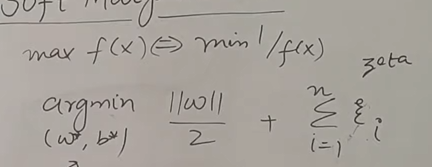 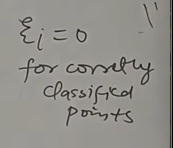